# Topic 4: Data Science Process
## Forecast the prices of Avocado in the US

### Business Objective/Problem
- Bơ “Hass”, một công ty có trụ sở tại Mexico,  chuyên sản xuất nhiều loại quả bơ được bán ở Mỹ. Họ đã rất thành công trong những năm gần đây và muốn mở rộng. Vì vậy, họ muốn xây dựng mô hình hợp lý để dự đoán giá trung bình của bơ “Hass” ở Mỹ nhằm xem xét việc mở rộng các loại trang trại Bơ đang có cho việc trồng bơ ở các vùng khác.

## <font color="blue">Triển khai dự án</font>
### <font color="red"> Bước 1: Business Understanding </font>
#### Dựa vào mô tả nói trên (hoặc sau khi đặt ra các câu hỏi cụ thể cho doanh nghiệp và các đối tượng có liên quan) => xác định được vấn đề: 
- Hiện tại: Công ty kinh doanh quả bơ ở rất nhiều vùng của nước Mỹ với 2 loại bơ là bơ thường và bơ hữu cơ, được đóng gói theo nhiều quy chuẩn (Small/Large/XLarge Bags), và có 3 PLU (Product Look Up) khác nhau (4046, 4225, 4770). Nhưng họ chưa có mô hình để dự đoán giá bơ cho việc mở rộng.
- => Mục tiêu/ Vấn đề: Xây dựng mô hình dự đoán giá trung bình của bơ “Hass” ở Mỹ => xem xét việc mở rộng sản xuất, kinh doanh.

### <font color="red">Bước 2: Data Understanding/ Acquire </font>
#### Từ mục tiêu/ vấn đề đã xác định: xem xét các dữ liệu mà công ty đang có:
- Dữ liệu được lấy trực tiếp từ máy tính tiền của các nhà bán lẻ dựa trên doanh số bán lẻ thực tế của bơ Hass.
- Dữ liệu đại diện cho dữ liệu lấy từ máy quét bán lẻ hàng tuần cho lượng bán lẻ (National retail volume- units) và giá bơ từ tháng 4/2015 đến tháng 3/2018.
- Giá Trung bình (Average Price) trong bảng phản ánh giá trên một đơn vị (mỗi quả bơ), ngay cả khi nhiều đơn vị (bơ) được bán trong bao.
- Mã tra cứu sản phẩm - Product Lookup codes (PLU’s) trong bảng chỉ dành cho bơ Hass, không dành cho các sản phẩm khác.

### Toàn bộ dữ liệu được đổ ra và lưu trữ trong tập tin avocado.csv với 18249 record. Với các cột: 
- Date - ngày ghi nhận
- AveragePrice – giá trung bình của một quả bơ
- Type - conventional / organic – loại: thông thường/ hữu cơ
- Region – vùng được bán
- Total Volume – tổng số bơ đã bán
- 4046 – tổng số bơ có mã PLU 4046 đã bán
- 4225 - tổng số bơ có mã PLU 4225 đã bán
- 4770 - tổng số bơ có mã PLU 4770 đã bán
- Total Bags – tổng số túi đã bán
- Small/Large/XLarge Bags – tổng số túi đã bán theo size
##### Có hai loại bơ trong tập dữ liệu và một số vùng khác nhau. Điều này cho phép chúng ta thực hiện tất cả các loại phân tích cho các vùng khác nhau, hoặc phân tích toàn bộ nước Mỹ theo một trong hai loại bơ. 


#### => Có thể tập trung giải quyết hai bài toán 
- Bài toán 1: USA’s Avocado AveragePrice Prediction – Sử dụng các thuật toán Regression như Linear Regression, Random Forest, XGB Regressor...
- Bài toán 2: Conventional/Organic Avocado Average Price Prediction for the future in California/NewYork… - sử dụng các thuật toán Time Series như ARIMA, Prophet

### <font color="red">Bước 3: Data preparation/ Prepare<font>
#### Từ bước 3 trở đi cách triển khai cho hai bài toán sẽ khác nhau.

In [1]:
! pip install fbprophet

In [2]:
!pip install pandas-profiling==2.7.1 

     |████████████████████████████████| 256kB 3.9MB/s 
     |████████████████████████████████| 61kB 3.8MB/s 
     |████████████████████████████████| 81kB 4.4MB/s 
     |████████████████████████████████| 3.1MB 4.9MB/s 
     |████████████████████████████████| 1.1MB 18.9MB/s 
     |████████████████████████████████| 819kB 21.2MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27099 sha256=a39a935bee522e580dfc510d63f413e268ce2f798170cbd062195b5c697752a2
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for phik: filename=phik-0.11.2-cp37-none-any.whl size=1107437 sha256=342cddfdf314de43e24c168948375eda94dd0805b20519543e63516719eb1e73
  Stored in directory: /root/.cache/pip/wheels/c0/a3/b0/f27b1cfe32ea131a3715169132ff6d85653789e80e966c3bf6
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295206 sha256=c9bc49c84f1fe723c57d6981e7099fabc5f20be58913be2c3348ae70

In [3]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 2.9MB/s 
     |████████████████████████████████| 9.5MB 212kB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [4]:
!pip install xgboost

In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
import pandas_profiling as pp

from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima

from fbprophet import Prophet 
from fbprophet.plot import add_changepoints_to_plot

In [6]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

%cd '/content/gdrive/My Drive/HTDS/Topic_4/demo/'

Mounted at /content/gdrive
/content/gdrive/My Drive/HTDS/Topic_4/demo


In [7]:
data = pd.read_csv("avocado.csv")

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [9]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [10]:
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

In [11]:
data.head(2)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany


In [12]:
pp.ProfileReport(data)

Output hidden; open in https://colab.research.google.com to view.

# Bài toán 1: Organic Avocados' Price Prediction
## Linear Regression, Random Forest, XGB Regressor... - Regression Algorithm
### <font color="red">Bước 3: Data preparation/ Prepare <font>

##### <font color="red"> Note:  Use df for Regression Algorithm </font>

In [13]:
df = data.copy(deep=True)

#### Whether the Categorical Features ('type'/ 'region') affected the 'AveragePrice'?
- Whether 'type' affected to 'AveragePrice'?

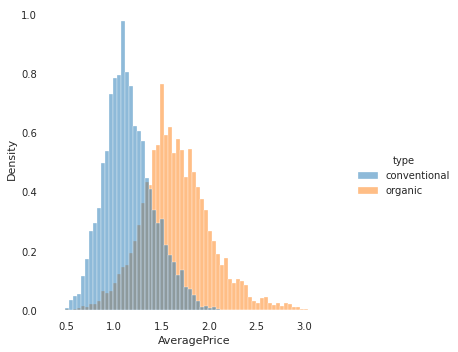

In [14]:
# AveragePrice Distribution/ Boxplot 0f 2 types of Avocados
sns.displot(df, x="AveragePrice", hue="type", stat="density")
plt.show()

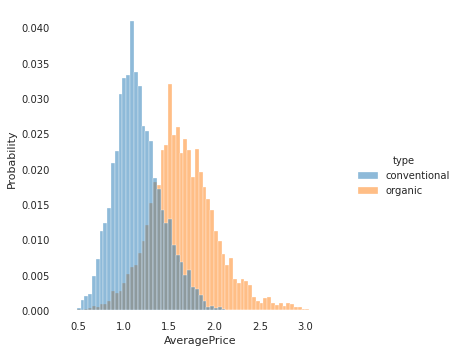

In [15]:
sns.displot(df, x="AveragePrice", hue="type", stat="probability")
plt.show()

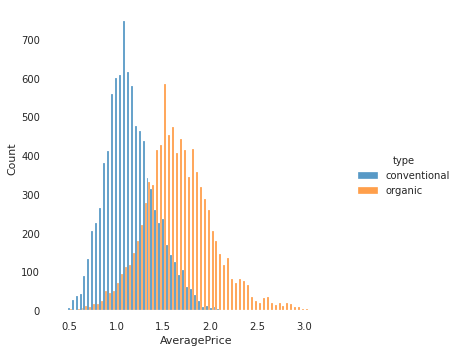

In [16]:
sns.displot(df, x="AveragePrice", hue="type", multiple="dodge")
plt.show()

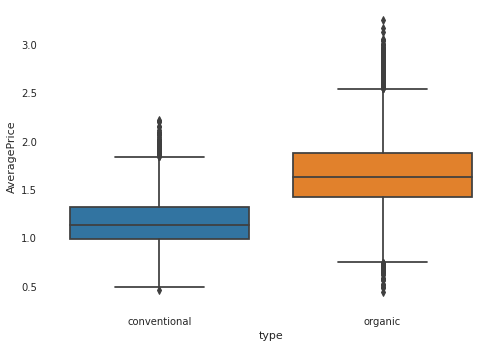

In [17]:
sns.boxplot(data = df, x="type", y="AveragePrice")
plt.show()

- Organic Avocado is more expensive than conventional avocado.
- "AveragePrice" was affected by "type"

In [18]:
# https://seaborn.pydata.org/tutorial/distributions.html

- Whether the 'region' affected 'AveragePrice'?

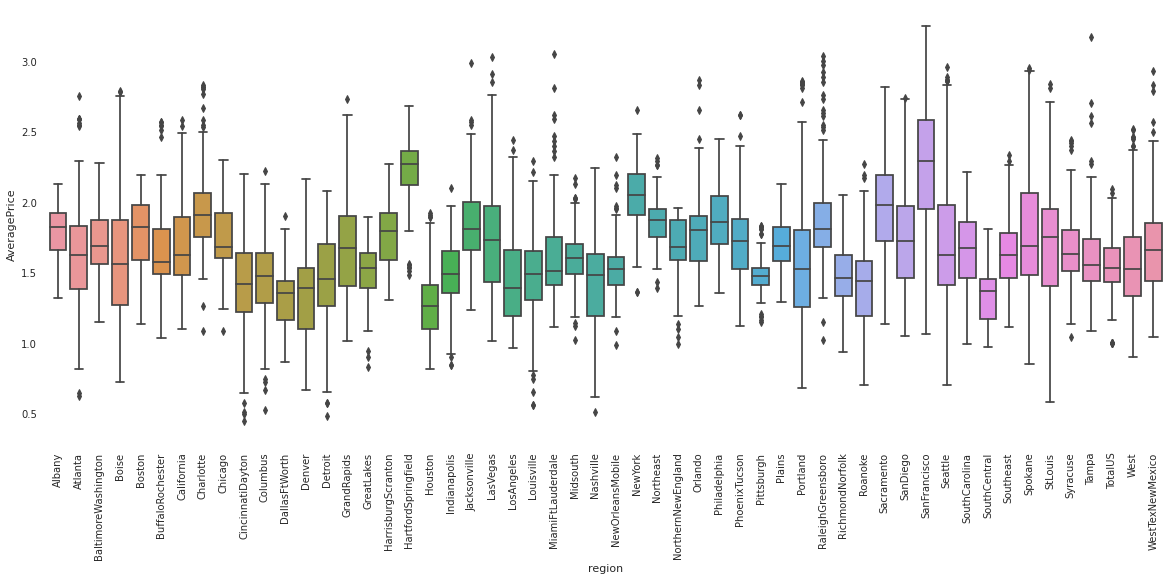

In [19]:
# type == 'organic'
fig, ax = plt.subplots(figsize=(20,8))
sns.boxplot(data = df[df['type']=='organic'], 
            x="region", y="AveragePrice", ax=ax)
plt.xticks(rotation=90)
plt.show()

- Some regions have high prices: ...
- Some regions have low prices: ...

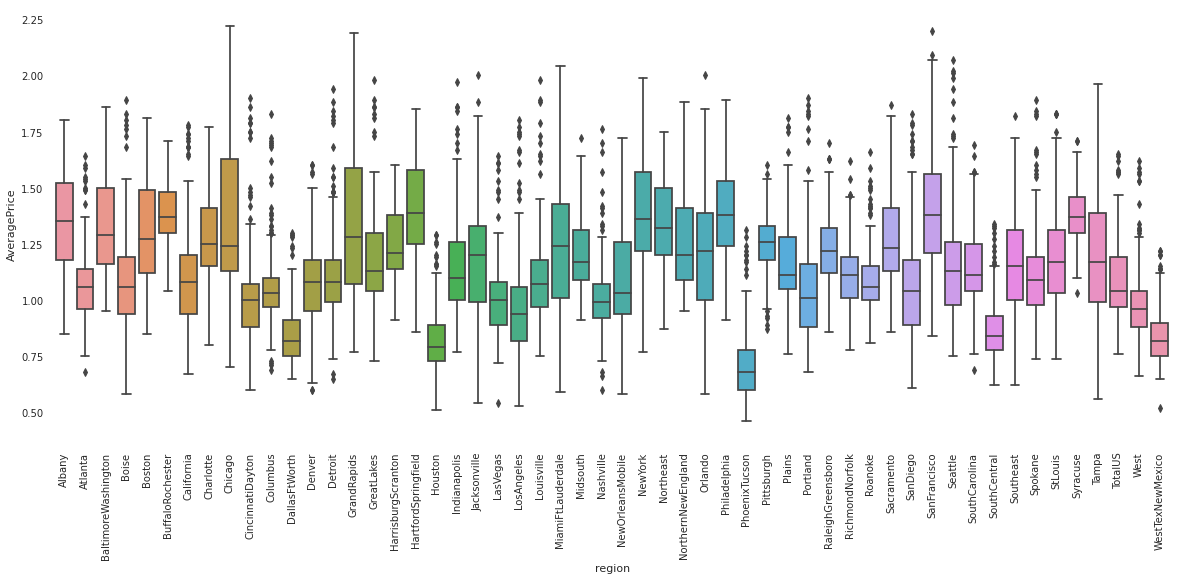

In [20]:
# type == 'conventional'
fig, ax = plt.subplots(figsize=(20,8))
sns.boxplot(data = df[df['type']=='conventional'], 
            x="region", y="AveragePrice", ax=ax)
plt.xticks(rotation=90)
plt.show()

- Some regions have high prices: ...
- Some regions have low prices: ...

- Yes, 'AveragePrice' was affected by 'region' (both in 'organic' type and 'conventional' type)


#### Whether the Continuous Features affected the 'AveragePrice'?

In [21]:
# Correlation
corr = df.corr()
corr

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000


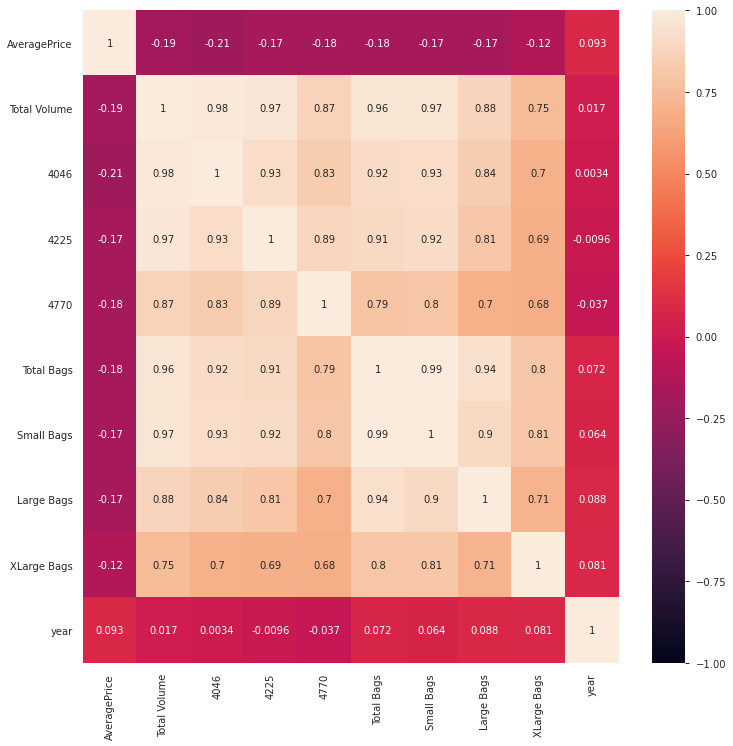

In [22]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True)
plt.show()

- Result: ???

### Check data

##### From Pandas Profiling Report we see that:
- No missing cells
- No duplicate rows

In [23]:
 # We can check again
df.isnull().any()

Date            False
AveragePrice    False
Total Volume    False
4046            False
4225            False
4770            False
Total Bags      False
Small Bags      False
Large Bags      False
XLarge Bags     False
type            False
year            False
region          False
dtype: bool

In [24]:
df.isna().any()

Date            False
AveragePrice    False
Total Volume    False
4046            False
4225            False
4770            False
Total Bags      False
Small Bags      False
Large Bags      False
XLarge Bags     False
type            False
year            False
region          False
dtype: bool

In [25]:
df.duplicated().any()

False

In [26]:
df.shape

(18249, 13)

In [27]:
df = df.drop_duplicates()
df.shape

(18249, 13)

#### Feature Engineering
- About Date, we can now the season in USA from https://seasonsyear.com/USA
- US’s spring months are March, April and May (3, 4, 5)
- US’s summer months are June, July and August (6, 7, 8)
- US’s autumn months are September, October and November (9, 10, 11)
- US’s autumn months are December, January and February (12, 1, 2)

In [28]:
def convert_month(month):
    if month == 3 or month == 4 or month == 5:
        return 0
    elif month == 6 or month == 7 or month == 8:
        return 1
    elif month == 9 or month == 10 or month == 11:
        return 2
    else:
        return 3

In [29]:
df['Date'] = pd.to_datetime(df['Date'])

In [30]:
df['Month'] = pd.DatetimeIndex(df['Date']).month

In [31]:
df['Season'] = df['Month'].apply(lambda x: convert_month(x))

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 18248
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
 13  Month         18249 non-null  int64         
 14  Season        18249 non-null  int64         
dtypes: datetime64[ns](1), float64(9), in

In [33]:
df.head(20)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Season
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,3
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,3
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,3
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,3
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,2
5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany,11,2
6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany,11,2
7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany,11,2
8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany,11,2
9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany,10,2


#### Whether 'Season' affects Average Price?

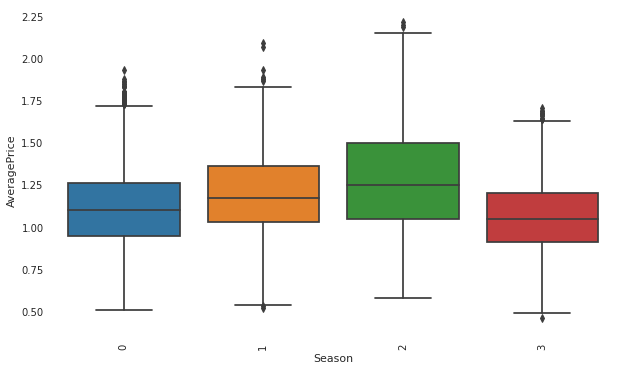

In [34]:
# type == 'conventional'
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(data = df[df['type']=='conventional'], 
            x="Season", y="AveragePrice", ax=ax)
plt.xticks(rotation=90)
plt.show()

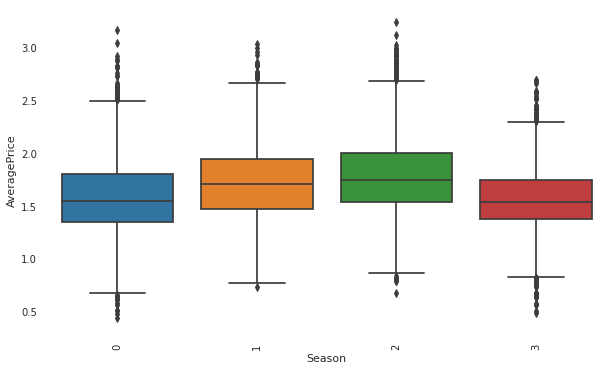

In [35]:
# type == 'organic'
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(data = df[df['type']=='organic'], 
            x="Season", y="AveragePrice", ax=ax)
plt.xticks(rotation=90)
plt.show()

- Yes, 'AveragePrice' was affected by 'Season' (both in 'organic' type and 'conventional' type)

In [36]:
# Label Encoder and Onehot Encoder for 'type' and 'region'

le = LabelEncoder()
df['type_new'] = le.fit_transform(df['type'])

In [37]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Season,type_new
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,3,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,3,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,3,0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,3,0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,2,0


In [38]:
df_ohe = pd.get_dummies(data=df, columns=['region'])
df_ohe.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month,Season,type_new,region_Albany,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_California,region_Charlotte,region_Chicago,region_CincinnatiDayton,region_Columbus,region_DallasFtWorth,region_Denver,region_Detroit,region_GrandRapids,region_GreatLakes,region_HarrisburgScranton,region_HartfordSpringfield,region_Houston,region_Indianapolis,region_Jacksonville,region_LasVegas,region_LosAngeles,region_Louisville,region_MiamiFtLauderdale,region_Midsouth,region_Nashville,region_NewOrleansMobile,region_NewYork,region_Northeast,region_NorthernNewEngland,region_Orlando,region_Philadelphia,region_PhoenixTucson,region_Pittsburgh,region_Plains,region_Portland,region_RaleighGreensboro,region_RichmondNorfolk,region_Roanoke,region_Sacramento,region_SanDiego,region_SanFrancisco,region_Seattle,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,12,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,12,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,12,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,12,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,11,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [39]:
# Choose ToTalVolume bc it has high corr with '4046','4225','4770','Small Bags','Large Bags','XLarge Bags'
X = df_ohe.drop(['Date', 'AveragePrice','type','4046','4225','4770','Small Bags', \
                 'Large Bags','XLarge Bags'], axis=1) 
y = df['AveragePrice']

In [40]:
X.head()

,Total Volume,Total Bags,year,Month,Season,type_new,region_Albany,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_California,region_Charlotte,region_Chicago,region_CincinnatiDayton,region_Columbus,region_DallasFtWorth,region_Denver,region_Detroit,region_GrandRapids,region_GreatLakes,region_HarrisburgScranton,region_HartfordSpringfield,region_Houston,region_Indianapolis,region_Jacksonville,region_LasVegas,region_LosAngeles,region_Louisville,region_MiamiFtLauderdale,region_Midsouth,region_Nashville,region_NewOrleansMobile,region_NewYork,region_Northeast,region_NorthernNewEngland,region_Orlando,region_Philadelphia,region_PhoenixTucson,region_Pittsburgh,region_Plains,region_Portland,region_RaleighGreensboro,region_RichmondNorfolk,region_Roanoke,region_Sacramento,region_SanDiego,region_SanFrancisco,region_Seattle,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,64236.62,8696.87,2015,12,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,54876.98,9505.56,2015,12,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,118220.22,8145.35,2015,12,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,78992.15,5811.16,2015,12,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,51039.60,6183.95,2015,11,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### <font color="red"> Bước 4&5: Modeling & Evaluation/ Analyze & Report </font>

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=0)

In [42]:
# Have many range values => Scaler (and large samples ~ 18k) => StandardScaler

In [43]:
pipe_LR = Pipeline([('scaler', StandardScaler()), ('lr', LinearRegression())])
pipe_LR.fit(X_train, y_train)
y_pred_LR = pipe_LR.predict(X_test)
r2_score(y_test, y_pred_LR)

0.5819622411510237

In [44]:
mae_LR = mean_absolute_error(y_test, y_pred_LR)
mae_LR

0.1967517994806079

In [45]:
pipe_RF = Pipeline([('scaler', StandardScaler()), ('rf', RandomForestRegressor())])
pipe_RF.fit(X_train, y_train)
y_pred_RF = pipe_RF.predict(X_test)
r2_score(y_test, y_pred_RF)

0.8976129399016536

In [46]:
mae_RF = mean_absolute_error(y_test, y_pred_RF)
mae_RF

0.08852778082191781

In [47]:
pipe_XGB = Pipeline([('scaler', StandardScaler()), ('xgb', XGBRegressor())])
pipe_XGB.fit(X_train, y_train)
y_pred_XGB = pipe_XGB.predict(X_test)
r2_score(y_test, y_pred_XGB)

[08:25:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.7008999415308614

In [48]:
mae_XGB = mean_absolute_error(y_test, y_pred_XGB)
mae_XGB

0.16648036149212214

#### <font color='red'>Select RandomForestRegressor bc it has highest r^2 and lowest MAE </font>

In [49]:
pd.DataFrame(pipe_RF['rf'].feature_importances_, \
             index=X_train.columns, \
             columns=['feature_importances']).sort_values(by=['feature_importances'], \
                                                          ascending=False)

,feature_importances
type_new,0.382722
Total Bags,0.112970
Total Volume,0.084798
year,0.071905
Month,0.068886
Season,0.029598
region_HartfordSpringfield,0.024496
region_NewYork,0.021317
region_SanFrancisco,0.019233
region_Northeast,0.012682


- The most important features are: type_new	0.382148, Total Bags	0.112357, total Volume	0.085227 (Total ~ 0.58)

# Part 2: Organic Avocado Average Price Prediction for the future in California 
## ARIMA & PROPHET - Time Series Algorithm

In [50]:
# Make new dataframe from original dataframe: data
df_ca = data[data['region'] == 'California']
df_ca['Date'] = df_ca['Date'].str[:-3] 
df_ca = df_ca[df_ca['type'] == 'organic']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [51]:
df_ca.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
9438,2015-12,1.45,98576.63,14306.68,50893.97,0.00,33375.98,29507.45,3868.53,0.0,organic,2015,California
9439,2015-12,1.35,99793.55,12746.47,48195.95,1.52,38849.61,25535.80,13313.81,0.0,organic,2015,California
9440,2015-12,1.39,98605.40,13609.24,46518.56,3.05,38474.55,24359.79,14114.76,0.0,organic,2015,California
9441,2015-12,1.48,91211.53,17839.96,47527.65,1.53,25842.39,25661.06,181.33,0.0,organic,2015,California
9442,2015-11,1.75,83415.54,13195.19,48229.29,0.00,21991.06,21671.70,319.36,0.0,organic,2015,California


In [52]:
df_ca.shape

(169, 13)

In [53]:
agg = {'AveragePrice': 'mean'}
df_ca_gr = df_ca.groupby(df_ca['Date']).aggregate(agg).reset_index()
df_ca_gr.head()

,Date,AveragePrice
0,2015-01,1.2200
1,2015-02,1.3475
2,2015-03,1.3960
3,2015-04,1.5100
4,2015-05,1.4740


In [54]:
df_ts = pd.DataFrame() 
df_ts['ds'] = pd.to_datetime(df_ca_gr['Date']) 
df_ts['y'] = df_ca_gr['AveragePrice'] 
df_ts.head()

,ds,y
0,2015-01-01,1.2200
1,2015-02-01,1.3475
2,2015-03-01,1.3960
3,2015-04-01,1.5100
4,2015-05-01,1.4740


In [55]:
df_ts.tail()

,ds,y
34,2017-11-01,1.9325
35,2017-12-01,1.7960
36,2018-01-01,1.7800
37,2018-02-01,1.8000
38,2018-03-01,1.6500


In [56]:
df_ts.shape

(39, 2)

In [57]:
# Mean of Organic Avocado AveragePrice in California
df_ts['y'].mean()

1.6847820512820515

#### Use df_ts1 for ARIMA, df_ts for Prophet

In [58]:
df_ts1 = df_ts.copy(deep=False)

In [59]:
df_ts1.index = pd.to_datetime(df_ts1.ds)

In [60]:
df_ts1.index

DatetimeIndex(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01'],
              dtype='datetime64[ns]', name='ds', freq=None)

In [61]:
df_ts1.head()

,ds,y
ds,,
2015-01-01,2015-01-01,1.2200
2015-02-01,2015-02-01,1.3475
2015-03-01,2015-03-01,1.3960
2015-04-01,2015-04-01,1.5100
2015-05-01,2015-05-01,1.4740


In [62]:
df_ts1 = df_ts1.drop(['ds'], axis=1)

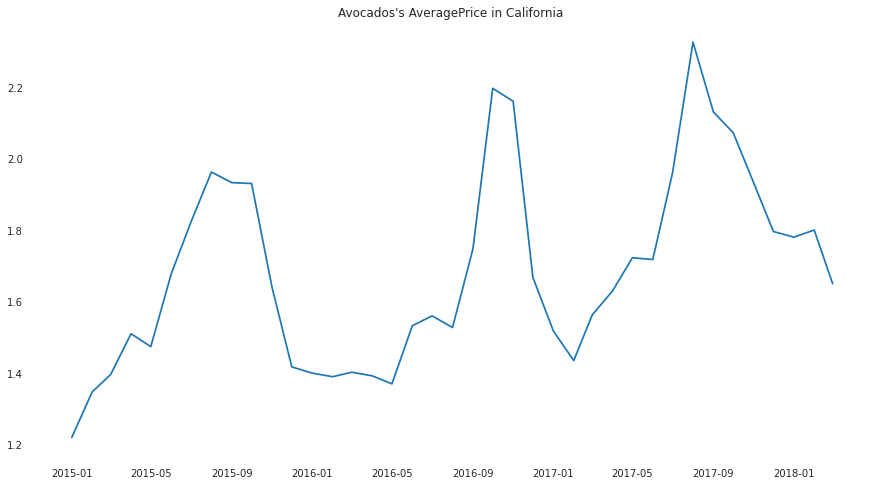

In [63]:
plt.figure(figsize=(15,8))
plt.plot(df_ts1)
plt.title("Avocados' AveragePrice in California ")
plt.show()

In [64]:
decompose_result = seasonal_decompose(df_ts1, model='multiplicative')
decompose_result

<Figure size 1080x288 with 0 Axes>

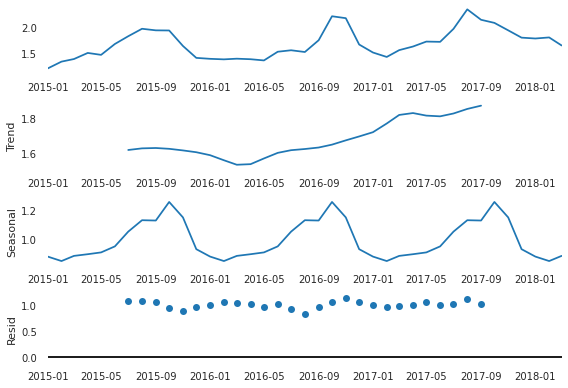

In [65]:
plt.figure(figsize=(15,4))
decompose_result.plot()
plt.show()

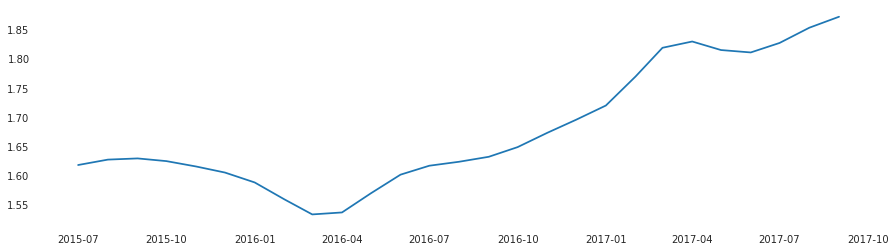

In [66]:
plt.figure(figsize=(15,4))
plt.plot(decompose_result.trend)
plt.show()

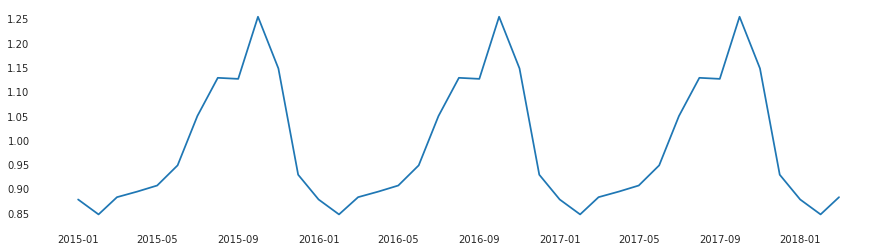

In [67]:
plt.figure(figsize=(15,4))
plt.plot(decompose_result.seasonal)
plt.show()

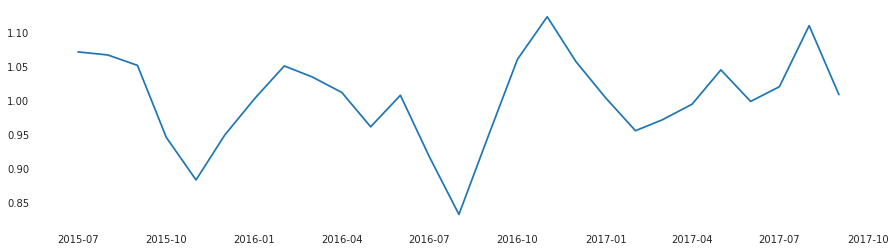

In [68]:
plt.figure(figsize=(15,4))
plt.plot(decompose_result.resid)
plt.show()

- With the above results, we can clearly see the seasonal component of the data, and also see that the trend is nonlinear. Residual ranges from 0.85 => 1.15


### <font color="red"> Bước 4&5: Modeling & Evaluation/ Analyze & Report</font>
### ARIMA

In [69]:
stepwise_model = auto_arima(df_ts1, start_p=2, start_q=2,
                           max_p=3, max_q=3, m=12,
                           start_P=1, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=-10.256, Time=1.06 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=0.610, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-11.187, Time=0.27 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.27 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1.204, Time=0.04 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=-9.729, Time=0.49 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=-9.727, Time=0.50 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=0.21 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=-7.729, Time=0.60 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=-13.157, Time=0.11 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=-11.726, Time=0.74 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=-11.725, Time=0.31 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.20 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=-9.726, Time=0.62 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=-12.336, T

In [70]:
print(stepwise_model.aic())

-13.156518248739228


In [71]:
df_ts1.shape

(39, 1)

In [72]:
train = df_ts1.loc['2015-01-01':'2017-06-01'] 
test = df_ts1.loc['2017-06-01':] 

In [73]:
len(test)

10

In [74]:
# Fit model
stepwise_model.fit(train)

ARIMA(maxiter=50, method='lbfgs', order=(0, 1, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(1, 1, 0, 12),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

In [75]:
future_forecast = stepwise_model.predict(n_periods=len(test))

In [76]:
future_forecast

array([1.65995785, 1.50297062, 1.90354948, 2.67846658, 2.82630238,
       2.13838637, 1.89334966, 1.75751496, 1.96824771, 2.09183934])

In [77]:
rmse = sqrt(mean_squared_error(test, future_forecast))
rmse

0.39185407774697545

In [78]:
mae = mean_absolute_error(test, future_forecast)
mae

0.31745991220269343

In [79]:
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=['Prediction'])

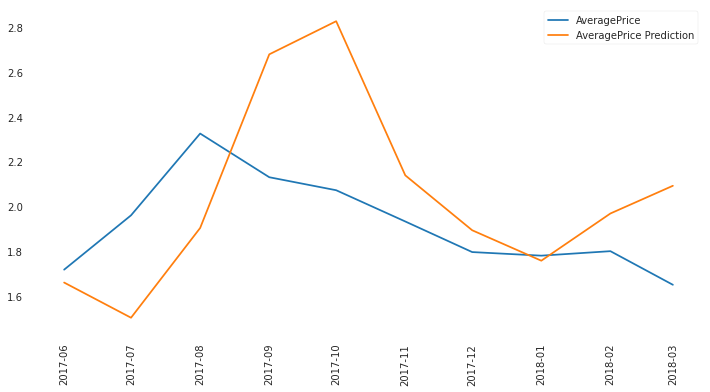

In [80]:
# Visulaize the result
plt.figure(figsize=(12,6))
plt.plot(test, label='AveragePrice')
plt.plot(future_forecast, label='AveragePrice Prediction')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

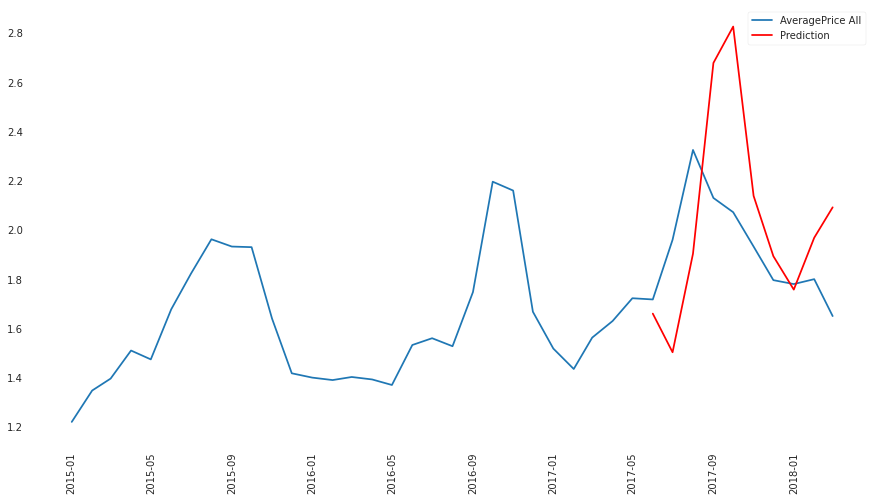

In [81]:
plt.figure(figsize=(15,8))
plt.plot(df_ts1, label='AveragePrice All')
plt.plot(future_forecast, label='Prediction', color='red')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

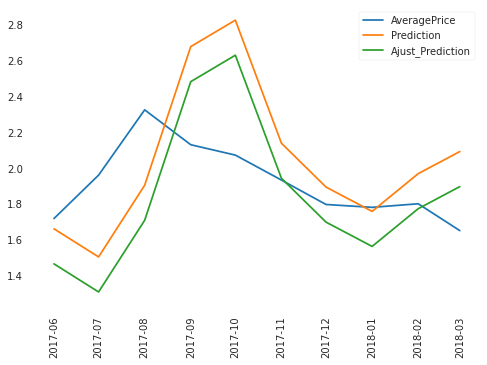

In [82]:
plt.plot(test, label='AveragePrice')
plt.plot(future_forecast, label='Prediction')
plt.plot(future_forecast-0.5*rmse, label='Ajust_Prediction')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

- Because the increase and decrease is not uniform, it is difficult to find an adaptive value (Vì sự tăng giảm không đồng đều nên khó tìm được giá trị thích nghi)

#### Prediction for the next 12 months

In [83]:
future_forecast_12 = stepwise_model.predict(n_periods=len(test)+12) 
future_forecast_12

array([1.65995785, 1.50297062, 1.90354948, 2.67846658, 2.82630238,
       2.13838637, 1.89334966, 1.75751496, 1.96824771, 2.09183934,
       2.26757208, 2.14134178, 2.02224927, 1.77516279, 2.30643795,
       3.31760366, 3.598493  , 2.76914213, 2.45495948, 2.28088498,
       2.55185851, 2.71604718])

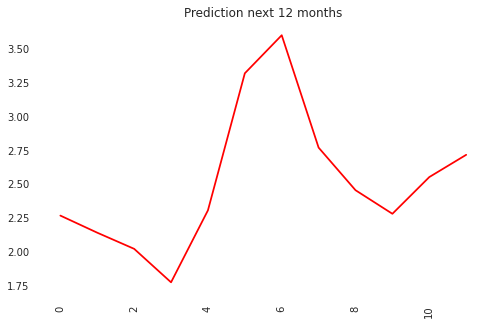

In [84]:
plt.figure(figsize=(8,5))
plt.plot(future_forecast_12[len(test):], color='red', label='Prediction')
plt.xticks(rotation='vertical')
plt.title("Prediction next 12 months")
plt.show()

In [85]:
test.tail()

,y
ds,
2017-11-01,1.9325
2017-12-01,1.7960
2018-01-01,1.7800
2018-02-01,1.8000
2018-03-01,1.6500


In [86]:
future_forecast_12[len(test):]

array([2.26757208, 2.14134178, 2.02224927, 1.77516279, 2.30643795,
       3.31760366, 3.598493  , 2.76914213, 2.45495948, 2.28088498,
       2.55185851, 2.71604718])

In [87]:
months = pd.date_range('2018-04-01','2019-03-01', 
              freq='MS').strftime("%Y-%m-%d").tolist()    

In [88]:
new_predict = pd.DataFrame({
    'ds' : months,
    'y': future_forecast_12[len(test):]}    
    )
new_predict

,ds,y
0,2018-04-01,2.267572
1,2018-05-01,2.141342
2,2018-06-01,2.022249
3,2018-07-01,1.775163
4,2018-08-01,2.306438
5,2018-09-01,3.317604
6,2018-10-01,3.598493
7,2018-11-01,2.769142
8,2018-12-01,2.454959
9,2019-01-01,2.280885


- Because of the small amount of data (just over 3 years), the prediction of the orgnic avocado's AveragePrice in California is not accurate, mae ~ 0.32 ( about ~20% of the mean AveragePrice), which is quite high compared to the AveragePrice of ~ 1.68)
- <font color='blue'>Try another prediction algorithm: Prophet (of Facebook)</font>

### <font color="blue">Prophet</font>
- https://machinelearningmastery.com/time-series-forecasting-with-prophet-in-python/
- https://facebook.github.io/prophet/docs/quick_start.html
- https://mode.com/example-gallery/forecasting_prophet_python_cookbook/

##### Train/Test Prophet


In [89]:
# create test dataset, remove last 10 months
train = df_ts.drop(df_ts.index[-10:])
train.tail()

,ds,y
24,2017-01-01,1.5180
25,2017-02-01,1.4350
26,2017-03-01,1.5625
27,2017-04-01,1.6300
28,2017-05-01,1.7225


In [90]:
test = df_ts.drop(df_ts.index[0:-10])

In [91]:
test

,ds,y
29,2017-06-01,1.7175
30,2017-07-01,1.9600
31,2017-08-01,2.3250
32,2017-09-01,2.1300
33,2017-10-01,2.0720
34,2017-11-01,1.9325
35,2017-12-01,1.7960
36,2018-01-01,1.7800
37,2018-02-01,1.8000
38,2018-03-01,1.6500


In [92]:
len(test)

10

##### Build model

In [93]:
model = Prophet(yearly_seasonality=True, \
            daily_seasonality=False, weekly_seasonality=False) 

In [94]:
model.fit(train)

INFO:fbprophet:n_changepoints greater than number of observations. Using 22.


In [95]:
# 10 month in test and 12 month to predict new values
months = pd.date_range('2017-06-01','2019-03-01', 
              freq='MS').strftime("%Y-%m-%d").tolist()    
future = pd.DataFrame(months)
future.columns = ['ds']
future['ds'] = pd.to_datetime(future['ds'])

In [96]:
# Use the model to make a forecast
forecast = model.predict(future)

In [97]:
forecast[["ds", "yhat"]].head(10)

,ds,yhat
0,2017-06-01,1.881961
1,2017-07-01,1.954895
2,2017-08-01,1.981544
3,2017-09-01,2.118380
4,2017-10-01,2.410878
5,2017-11-01,2.283110
6,2017-12-01,1.880950
7,2018-01-01,1.714532
8,2018-02-01,1.724829
9,2018-03-01,1.843153


In [98]:
# calculate MAE/RMSE between expected and predicted values for december
y_test = test['y'].values
y_pred = forecast['yhat'].values[:10]
mae_p = mean_absolute_error(y_test, y_pred)
print('MAE: %.3f' % mae_p)

MAE: 0.163


In [99]:
rmse_p = sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: %.3f' % rmse_p)

RMSE: 0.209


- This result shows that prophet's rmse and mae are better than ARIMA's
Although the amount of data is small (just over 3 years), it is acceptable to predict the organic avocado AveragePrice in California, mae = 0.16 (about 10% of the AveragePrice), compared to the AveragePrice ~ 1.68.
- We can see that Prophet (Facebook's) algorithm gives better results.
#### <font color='red'>Choose Prophet for predicting avocado prices in California in the near future.</font>

In [100]:
y_test

array([1.7175, 1.96  , 2.325 , 2.13  , 2.072 , 1.9325, 1.796 , 1.78  ,
       1.8   , 1.65  ])

In [101]:
y_pred 

array([1.88196075, 1.95489509, 1.98154393, 2.11837971, 2.41087761,
       2.28311004, 1.88094986, 1.71453189, 1.72482912, 1.84315262])

In [102]:
y_test_value = pd.DataFrame(y_test, index = pd.to_datetime(test['ds']),columns=['Actual'])
y_pred_value = pd.DataFrame(y_pred, index = pd.to_datetime(test['ds']),columns=['Prediction'])

In [103]:
y_test_value

,Actual
ds,
2017-06-01,1.7175
2017-07-01,1.9600
2017-08-01,2.3250
2017-09-01,2.1300
2017-10-01,2.0720
2017-11-01,1.9325
2017-12-01,1.7960
2018-01-01,1.7800
2018-02-01,1.8000


In [104]:
y_pred_value

,Prediction
ds,
2017-06-01,1.881961
2017-07-01,1.954895
2017-08-01,1.981544
2017-09-01,2.118380
2017-10-01,2.410878
2017-11-01,2.283110
2017-12-01,1.880950
2018-01-01,1.714532
2018-02-01,1.724829


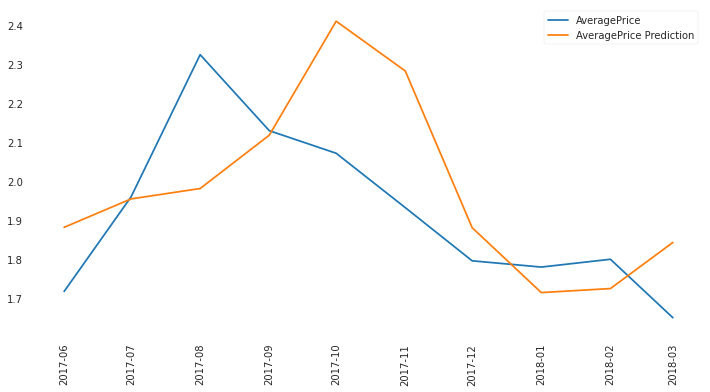

In [105]:
# Visulaize the result
plt.figure(figsize=(12,6))
plt.plot(y_test_value, label='AveragePrice')
plt.plot(y_pred_value, label='AveragePrice Prediction')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

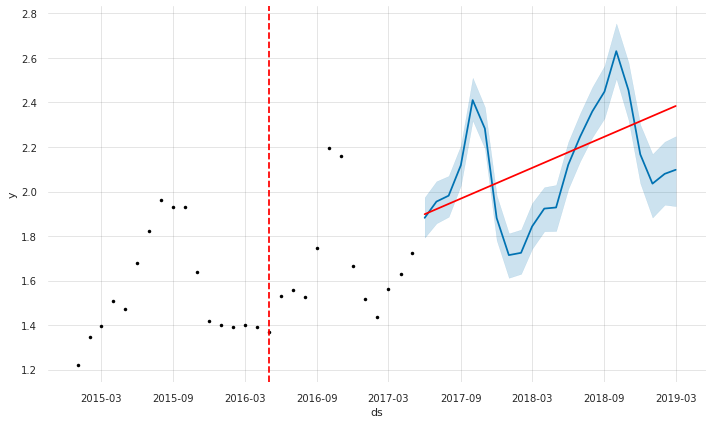

In [106]:
fig = model.plot(forecast) 
fig.show()
a = add_changepoints_to_plot(fig.gca(), model, forecast)

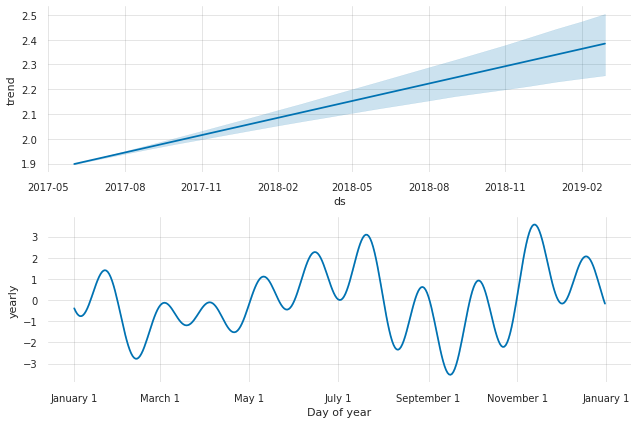

In [107]:
fig1 = model.plot_components(forecast)
fig1.show()

##### Predition for the next 12 months

In [108]:
forecast[["ds", "yhat"]].tail(12)

,ds,yhat
10,2018-04-01,1.923462
11,2018-05-01,1.928491
12,2018-06-01,2.120709
13,2018-07-01,2.246075
14,2018-08-01,2.359688
15,2018-09-01,2.448747
16,2018-10-01,2.630615
17,2018-11-01,2.455103
18,2018-12-01,2.167083
19,2019-01-01,2.035512


#### <font color="blue"> Long-term prediction for the next 5 years => Consider whether to expand cultivation/production, and trading</font>

In [109]:
m = Prophet(yearly_seasonality=True, \
            daily_seasonality=False, weekly_seasonality=False) 
m.fit(df_ts)
future = m.make_future_dataframe(periods=12*5, freq='M') # next 5 years

In [110]:
forecast = m.predict(future) 

In [111]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
87,2022-03-31,2.506902,2.320933,2.699289,2.696619,2.575336,2.813562
88,2022-04-30,2.329192,2.141753,2.514090,2.711244,2.585451,2.833054
89,2022-05-31,2.532630,2.334150,2.735367,2.726357,2.598119,2.852167
90,2022-06-30,2.855966,2.665693,3.029171,2.740981,2.609616,2.869933
91,2022-07-31,3.295002,3.103270,3.482482,2.756094,2.619763,2.888528
92,2022-08-31,3.164768,2.960719,3.357570,2.771206,2.630085,2.907771
93,2022-09-30,2.911124,2.712591,3.109224,2.785831,2.639310,2.926840
94,2022-10-31,2.574144,2.355746,2.783228,2.800944,2.650122,2.946237
95,2022-11-30,2.736732,2.518020,2.947802,2.815569,2.660771,2.965358
96,2022-12-31,2.715594,2.503579,2.925489,2.830681,2.671657,2.983848


In [112]:
forecast.shape

(99, 16)

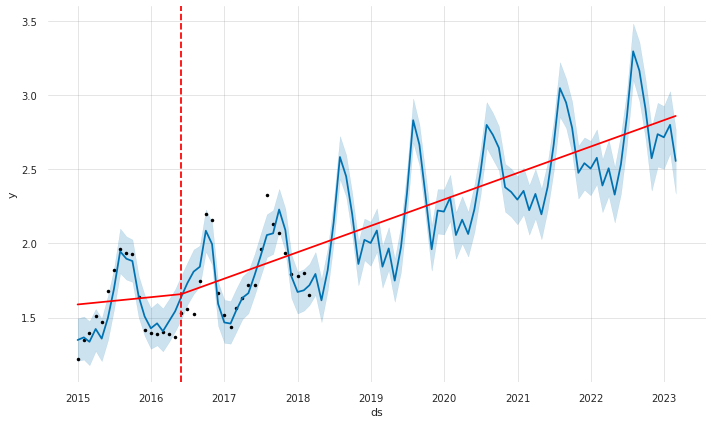

In [113]:
fig = m.plot(forecast) 
fig.show()
a = add_changepoints_to_plot(fig.gca(), m, forecast)

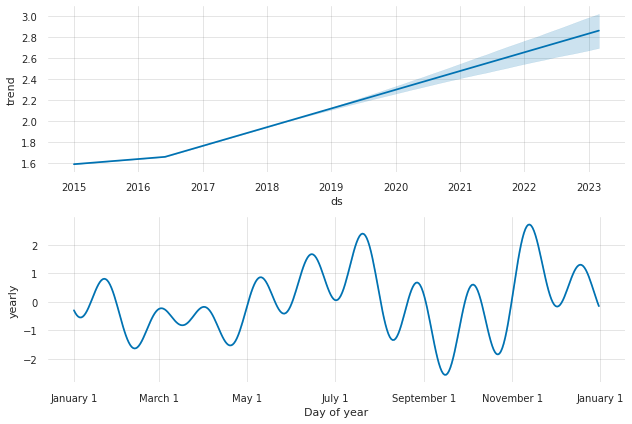

In [114]:
fig1 = m.plot_components(forecast)
fig1.show()

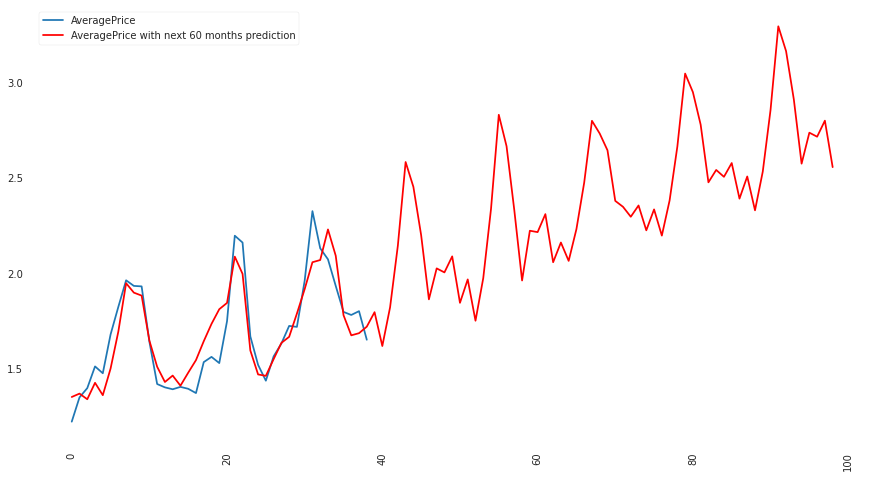

In [115]:
plt.figure(figsize=(15,8))
plt.plot(df_ts['y'], label='AveragePrice')
plt.plot(forecast['yhat'], label='AveragePrice with next 60 months prediction', 
         color='red')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

##### <font color='blue'> Based on the above results, we can see that it is possible to expand the cultivation/production and trading of organic avocados in California</font>

### <font color="red"> Bước 6: Deployment & Feedback/ Act </font>
#### Provide suitable business strategies for different regions to increase revenue and expand production.
